In [132]:
red_wine=pd.read_csv('data/winequality-red.csv',sep=';')
white_wine=pd.read_csv('data/winequality-white.csv',sep=';')

red_wine['color']=1
white_wine['color']=0

wine=pd.concat([red_wine, white_wine])

In [133]:
import plotly.express as px
fig = px.histogram(wine, x="quality")
fig.show()

In [134]:
fig = px.histogram(wine, x="quality", color='color')
fig.show()

In [25]:
X=wine.drop(['color'],axis=1)
y=wine['color']

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,  test_size=0.2, random_state=13)
np.unique(y_train, return_counts=True)

(array([0, 1]), array([3913, 1284]))

In [31]:
import plotly.graph_objects as go
fig =go.Figure()
fig.add_trace(go.Histogram(x=X_train['quality'],name="Train"))
fig.add_trace(go.Histogram(x=X_test['quality'],name="Train"))

fig.update_layout(barmode="overlay")
fig.update_traces(opacity=0.75)
fig.show()

In [35]:
from sklearn.tree import DecisionTreeClassifier

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train )

DecisionTreeClassifier(max_depth=2, random_state=13)

In [42]:
from sklearn.metrics import accuracy_score

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)
print(accuracy_score(y_train, y_pred_tr),accuracy_score(y_test,y_pred_test)) 

0.9553588608812776 0.9569230769230769


In [43]:
fig= go.Figure()
fig.add_trace(go.Box(y=X['fixed acidity'], name='fixed acidity'))
fig.add_trace(go.Box(y=X['chlorides'], name='chlorides'))
fig.add_trace(go.Box(y=X['quality'], name='quality'))

In [51]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
MMS = MinMaxScaler()
SS = StandardScaler()

SS.fit(X)
MMS.fit(X)

X_ss=SS.transform(X)
X_mms=MMS.transform(X)

X_ss_pd=pd.DataFrame(X_ss, columns=X.columns)
X_mms_pd=pd.DataFrame(X_mms, columns=X.columns)



In [54]:
fig= go.Figure()
fig.add_trace(go.Box(y=X_mms_pd['fixed acidity'], name='fixed acidity'))
fig.add_trace(go.Box(y=X_mms_pd['chlorides'], name='chlorides'))
fig.add_trace(go.Box(y=X_mms_pd['quality'], name='quality'))

In [53]:
fig= go.Figure()
fig.add_trace(go.Box(y=X_ss_pd['fixed acidity'], name='fixed acidity'))
fig.add_trace(go.Box(y=X_ss_pd['chlorides'], name='chlorides'))
fig.add_trace(go.Box(y=X_ss_pd['quality'], name='quality'))

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_ss_pd,y,  test_size=0.2, random_state=13)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)
print(accuracy_score(y_train, y_pred_tr),accuracy_score(y_test,y_pred_test)) 

0.904945160669617 0.9061538461538462


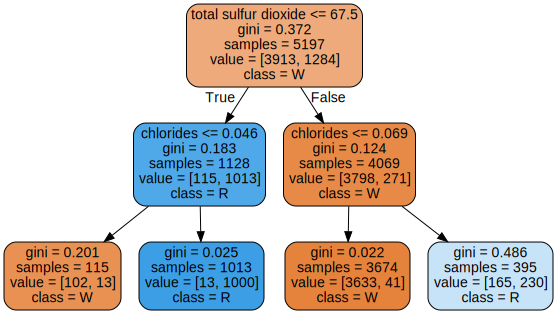

In [66]:
from graphviz import Source
from sklearn.tree import export_graphviz 

Source(export_graphviz(wine_tree, feature_names=X_train.columns, class_names=['W',"R"], rounded=True, filled=True))

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_mms_pd,y,  test_size=0.2, random_state=13)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)
print(accuracy_score(y_train, y_pred_tr),accuracy_score(y_test,y_pred_test)) 

0.4635366557629402 0.4492307692307692


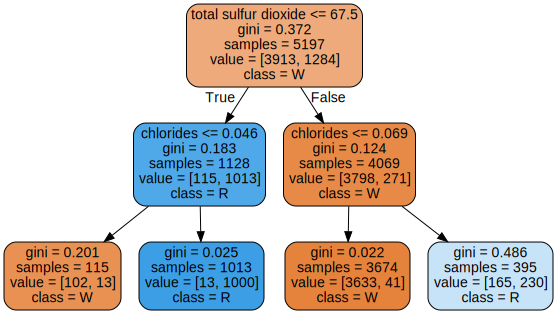

In [68]:
from graphviz import Source
from sklearn.tree import export_graphviz 

Source(export_graphviz(wine_tree, feature_names=X_train.columns, class_names=['W',"R"], rounded=True, filled=True))

In [64]:
dict(zip(X_train.columns, wine_tree.feature_importances_))

{'fixed acidity': 0.0,
 'volatile acidity': 0.0,
 'citric acid': 0.0,
 'residual sugar': 0.0,
 'chlorides': 0.24230360549660776,
 'free sulfur dioxide': 0.0,
 'total sulfur dioxide': 0.7576963945033922,
 'density': 0.0,
 'pH': 0.0,
 'sulphates': 0.0,
 'alcohol': 0.0,
 'quality': 0.0}

In [69]:
#taste By 2

wine["taste"] = [1. if grade >5 else 0. for grade in wine['quality']]
wine.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020

In [114]:
X = wine.drop(['taste'], axis=1) 
y = wine['taste']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [115]:
y_pred_train = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

accuracy_score( y_train, y_pred_train),accuracy_score( y_test, y_pred_test)

(1.0, 1.0)

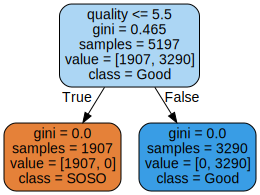

In [116]:
Source(export_graphviz(wine_tree, feature_names=X_train.columns, class_names=['SOSO','Good'], rounded=True, filled=True))

In [117]:
X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13) 

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [118]:
y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

accuracy_score(y_train, y_pred_tr), accuracy_score(y_test, y_pred_test)


(0.7294593034442948, 0.7161538461538461)

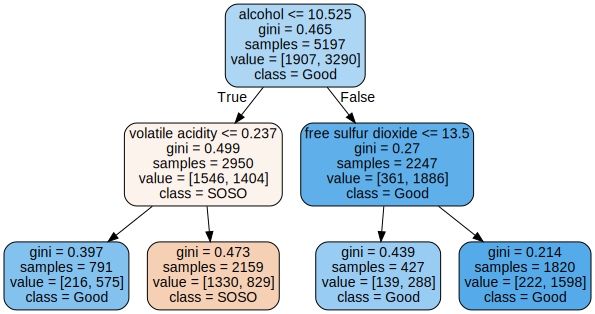

In [119]:
Source(export_graphviz(wine_tree, feature_names=X_train.columns, class_names=['SOSO','Good'], rounded=True, filled=True))

In [120]:
#pipeline  
X=wine.drop(['color'], axis=1)
y=wine['color']

In [121]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

estimator = [('scaler', StandardScaler()),('clf', DecisionTreeClassifier())]
pipe = Pipeline(estimator)

In [122]:
pipe.steps

[('scaler', StandardScaler()), ('clf', DecisionTreeClassifier())]

In [123]:
pipe.steps[0]

('scaler', StandardScaler())

In [124]:
pipe.steps[1]

('clf', DecisionTreeClassifier())

In [125]:
pipe['scaler']

StandardScaler()

In [126]:
pipe.set_params(clf__max_depth=2)
pipe.set_params(clf__random_state=13)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

In [137]:
#summary
red_wine=pd.read_csv('data/winequality-red.csv',sep=';')
white_wine=pd.read_csv('data/winequality-white.csv',sep=';')

red_wine['color']=1
white_wine['color']=0

wine=pd.concat([red_wine, white_wine])

0.7371560515682124 0.7276923076923076


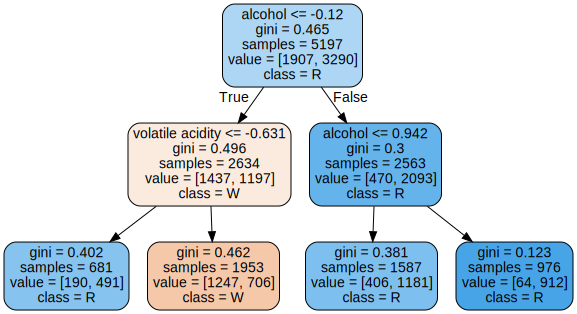

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from graphviz import Source
from sklearn.tree import export_graphviz 

wine["taste"] = [1. if grade >5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=13, stratify=y)

pipe.fit(X_train, y_train)

y_pred_tr = pipe.predict(X_train)

y_pred_test = pipe.predict(X_test)

print(accuracy_score(y_train, y_pred_tr), accuracy_score(y_test, y_pred_test))

Source(export_graphviz(pipe['clf'], feature_names=X_train.columns, class_names=['W',"R"], rounded=True, filled=True))

In [140]:
#validation
# simple example
from sklearn.model_selection import KFold

X= np.array([[1,2],[3,4],[1,2],[3,4]])

y = np.array([1,2,3,4])
kf = KFold(n_splits = 2)
print(kf.get_n_splits(X))
print(kf)

for train_idx, test_idx in kf.split(X):
    print("---idx")
    print(train_idx, test_idx)
    print('--- train data')
    print(X[train_idx])
    print('--- val data')
    print(X[test_idx])
    
from sklearn.model_selection import KFold
kfold = KFold(n_splits=4)
wine_tree_cv =DecisionTreeClassifier(max_depth=2, random_state=13)

for train_idx, test_idx in kfold.split(X):
    print(len(train_idx), len(test_idx))

2
KFold(n_splits=2, random_state=None, shuffle=False)
---idx
[2 3] [0 1]
--- train data
[[1 2]
 [3 4]]
--- val data
[[1 2]
 [3 4]]
---idx
[0 1] [2 3]
--- train data
[[1 2]
 [3 4]]
--- val data
[[1 2]
 [3 4]]
3 1
3 1
3 1
3 1


In [151]:
from sklearn.model_selection import KFold 
kfold= KFold(n_splits=5)
wine_tree_cv = DecisionTreeClassifier(max_depth=2 ,  random_state=13)

In [153]:
for train_idx, test_idx in kfold.split(X):
    print(len(train_idx), len(test_idx))

5197 1300
5197 1300
5198 1299
5198 1299
5198 1299


In [158]:
cv_accuracy=[]
for train_idx, test_idx in kfold.split(X):
    X_train, X_test, = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test, = y.iloc[train_idx], y.iloc[test_idx]
    wine_tree_cv.fit(X_train, y_train)
    pred = wine_tree_cv.predict(X_test)
    cv_accuracy.append(accuracy_score(y_test, pred))
cv_accuracy

[0.6007692307692307,
 0.6884615384615385,
 0.7090069284064665,
 0.7628945342571208,
 0.7867590454195535]

In [159]:
np.mean(cv_accuracy)

0.709578255462782

In [162]:
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=5)
wine_tree_cv = DecisionTreeClassifier(max_depth=2, random_state=13)

cv_accuracy=[]
for train_idx, test_idx in kfold.split(X):
    X_train, X_test, = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test, = y.iloc[train_idx], y.iloc[test_idx]
    wine_tree_cv.fit(X_train, y_train)
    pred = wine_tree_cv.predict(X_test)
    cv_accuracy.append(accuracy_score(y_test, pred))
cv_accuracy,np.mean(cv_accuracy)

([0.6007692307692307,
  0.6884615384615385,
  0.7090069284064665,
  0.7628945342571208,
  0.7867590454195535],
 0.709578255462782)

In [166]:
#increase depth

from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate

skfold = StratifiedKFold(n_splits=5)
wine_tree_cv = DecisionTreeClassifier(max_depth=2, random_state=13)

cross_val_score(wine_tree_cv, X,y, scoring=None, cv=skfold)

array([0.55230769, 0.68846154, 0.71439569, 0.73210162, 0.75673595])

In [168]:
wine_tree_cv=DecisionTreeClassifier(max_depth=5, random_state=13 )
cross_validate(wine_tree_cv, X,y, scoring=None, cv=skfold, return_train_score=True)


{'fit_time': array([0.01871991, 0.01666617, 0.02172089, 0.01653099, 0.01456213]),
 'score_time': array([0.00211096, 0.00404787, 0.00187302, 0.00309396, 0.00183082]),
 'test_score': array([0.50076923, 0.62615385, 0.69745958, 0.7582756 , 0.74903772]),
 'train_score': array([0.78795459, 0.78045026, 0.77568295, 0.76356291, 0.76279338])}

In [179]:
#GridSearchCV for hyperparameter
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {'max_depth':[2,4,7,18]}
wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)

gridsearch = GridSearchCV(estimator=wine_tree,param_grid=params, cv=5) 
gridsearch.fit(X,y)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=2, random_state=13),
             param_grid={'max_depth': [2, 4, 7, 18]})

In [173]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(gridsearch.cv_results_)

{   'mean_fit_time': array([0.00987425, 0.01189318, 0.01920705, 0.03362527]),
    'mean_score_time': array([0.00382237, 0.00202436, 0.00192361, 0.00210481]),
    'mean_test_score': array([0.6888005 , 0.66356523, 0.65340854, 0.60491917]),
    'param_max_depth': masked_array(data=[2, 4, 7, 18],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object),
    'params': [   {'max_depth': 2},
                  {'max_depth': 4},
                  {'max_depth': 7},
                  {'max_depth': 18}],
    'rank_test_score': array([1, 2, 3, 4], dtype=int32),
    'split0_test_score': array([0.55230769, 0.51230769, 0.50846154, 0.47384615]),
    'split1_test_score': array([0.68846154, 0.63153846, 0.60307692, 0.57615385]),
    'split2_test_score': array([0.71439569, 0.72363356, 0.68360277, 0.6073903 ]),
    'split3_test_score': array([0.73210162, 0.73210162, 0.73672055, 0.67359507]),
    'split4_test_score': array([0.75673595, 0.7182448 , 0.73518091, 0.6936104

In [180]:
gridsearch.best_estimator_,gridsearch.best_score_,gridsearch.best_params_

(DecisionTreeClassifier(max_depth=2, random_state=13),
 0.6888004974240539,
 {'max_depth': 2})

In [187]:
#by pipeline
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

estimator = [('scaler', StandardScaler()), 
            ('clf', DecisionTreeClassifier(random_state=13))]
pipe= Pipeline(estimator)

param_grid = [{'clf__max_depth':[2,4,8,10]}]
gridsearch = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5)
gridsearch.fit(X,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf',
                                        DecisionTreeClassifier(random_state=13))]),
             param_grid=[{'clf__max_depth': [2, 4, 8, 10]}])

In [188]:
gridsearch.best_estimator_,  gridsearch.best_score_, gridsearch.cv_results_

(Pipeline(steps=[('scaler', StandardScaler()),
                 ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))]),
 0.6888004974240539,
 {'mean_fit_time': array([0.01458392, 0.01539745, 0.02419629, 0.02818899]),
  'std_fit_time': array([0.00281095, 0.00071352, 0.0011703 , 0.00067679]),
  'mean_score_time': array([0.00290251, 0.00245867, 0.00220037, 0.00211477]),
  'std_score_time': array([1.03702744e-03, 4.99308313e-04, 1.28255989e-04, 3.69827104e-05]),
  'param_clf__max_depth': masked_array(data=[2, 4, 8, 10],
               mask=[False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'clf__max_depth': 2},
   {'clf__max_depth': 4},
   {'clf__max_depth': 8},
   {'clf__max_depth': 10}],
  'split0_test_score': array([0.55230769, 0.51230769, 0.51461538, 0.51615385]),
  'split1_test_score': array([0.68846154, 0.63153846, 0.61615385, 0.60230769]),
  'split2_test_score': array([0.71439569, 0.72363356, 0.67667436, 0.66589684]),
  'split3

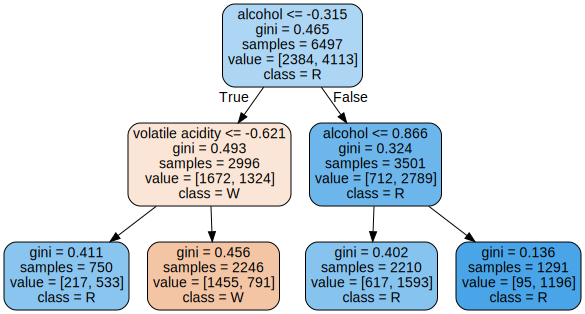

In [190]:
from graphviz import Source
from sklearn.tree import export_graphviz 

Source(export_graphviz(gridsearch.best_estimator_['clf'], feature_names=X_train.columns, class_names=['W',"R"], rounded=True, filled=True))